From 이수안 컴퓨터: http://suanlab.com/youtube/ml.html

# 다양체 학습 (Manifold Learning)

* 높은 차원의 데이터를 저차원으로 축소하는 방법

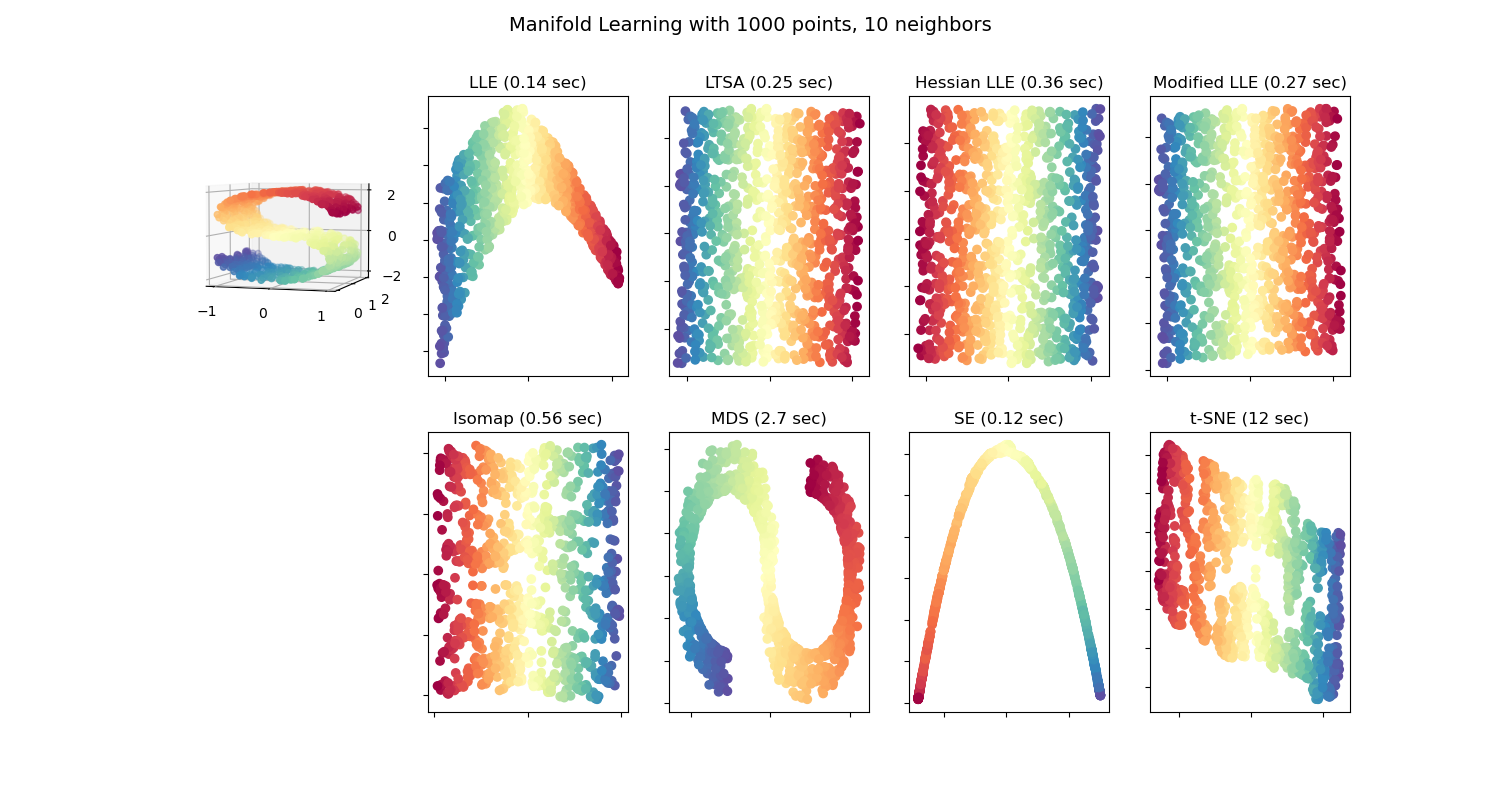

* 고차원 데이터를 2차원 또는 3차원으로 축소해 시각화에 활용할 수 있음
* 차원 축소 과정에서 중요하지 않은 정보는 버려지고 중요한 정보만 남기 때문에 데이터 정제에 활용 가능

## 데이터 생성 및 시각화 함수

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

from sklearn import manifold
from sklearn import random_projection
from sklearn import datasets

In [2]:
s_curve, color = datasets.make_s_curve(1000, random_state=2022)

In [3]:
digits, labels = datasets.load_digits(return_X_y=True)
rand_proj = random_projection.SparseRandomProjection(n_components=3, random_state=2022)
projected_digits = rand_proj.fit_transform(digits)

In [12]:
def min_max_scaler(x):
    min_value, max_value = np.min(x,0), np.max(x,0)
    x = (x - min_value) / (max_value - min_value)
    return x

In [19]:
def plot_s_curve(s_curve, color, position, projection):
    s_curve = min_max_scale(s_curve)
    if projection == '3d':
        ax = plt.subplot(position, projection=projection)
        ax.scatter(s_curve[:, 0], s_curve[:, 1], s_curve[:, 2], c=color, cmap=plt.cm.Spectral)
        ax.view_init(4, -72)
    elif projection == '2d':
        ax = plt.subplot(position)
        ax.scatter(s_curve[:, 0], s_curve[:, 1], c=color, cmap=plt.cm.Spectral)

In [20]:
def plot_digits(digits, labels, position, projection):
    digits = min_max_scaler(digits)
    if projection == '3d':
        ax = plt.subplot(position, projection=projection)
        for i in range(digits.shape[0]):
            ax.text(digits[i,0], digits[i,1], digits[i,2], str(labels[i]), 
                    color=plt.cm.Set1(labels[i] / 10.), fontdict={'weight':'bold', 'size': 9})
        ax.view_init(4, -72)
    elif projection == '2d':
        ax = plt.subplot(position)
        for i in range(digits.shape[0]):
            ax.text(digits[i,0], digits[i,1], str(labels[i]), 
                    color=plt.cm.Set1(labels[i] / 10.), fontdict={'weight':'bold', 'size': 9})

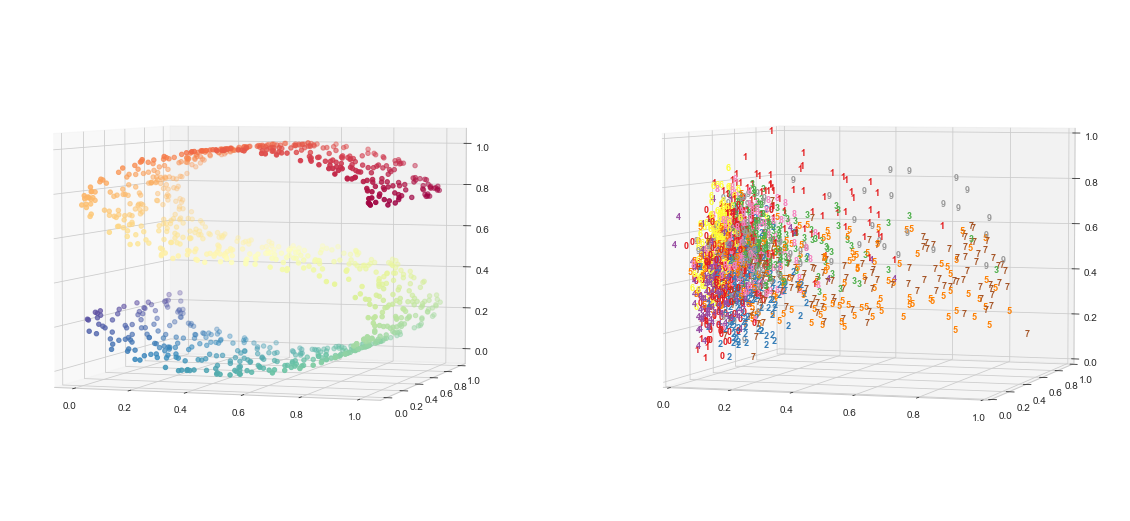

In [15]:
fig = plt.figure(figsize=(20,10))
plot_s_curve(s_curve, color, 121, '3d')
plot_digits(projected_digits, labels, 122, '3d')

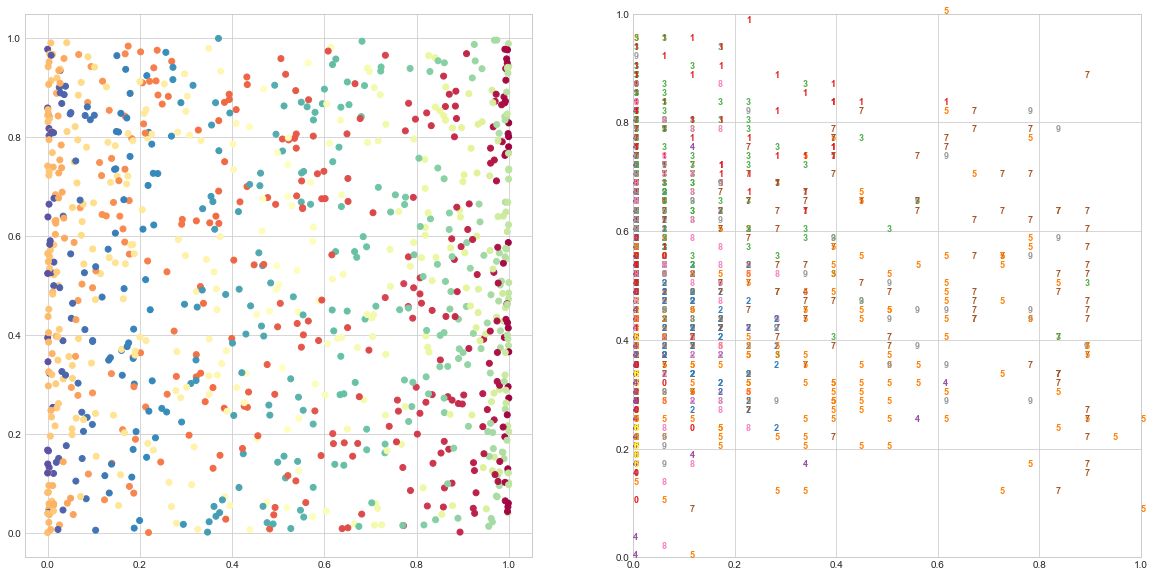

In [21]:
fig = plt.figure(figsize=(20,10))
plot_s_curve(s_curve, color, 121, '2d')
plot_digits(projected_digits, labels, 122, '2d')

## Locally Linear Embedding (LLE)

* 국소 이웃 거리를 보존하는 저차원 임베딩을 찾음

## Local Tangent Space Alignment (LTSA)

* 탄젠트 공간을 통해 각 이웃의 국소 성질을 특성화
* 국소 탄젠트 공간을 정렬

## Hessian Eigenmapping

* LLE의 문제를 해결한 다른 방법
* 국소 선형 구조를 복원하기 위해 각 이웃에서 hessian 기반의 이차 형태를 중심으로 회전

## Modified Locally Linear Embedding

* 각 이웃에 여러 가중치 벡터를 사용
* n_neighbors > n_components를 만족해야 함

## Isomap

* 초기의 다양체 학습 알고리즘
* MDS와 커널 PCA의 확장으로 볼 수 있음
* 모든 점들 사이의 측지 거리를 유지하는 저차원 임베딩을 찾음

## Multi-Dimensional Scaling (MDS)

* 고차원 공간에서의 거리를 고려하는 저차원 공간을 찾음

## Spectral Embedding

* 스펙트럼 분해를 통해 데이터의 저차원 표현을 찾음
* 데이터의 점이 저차원 공간에서도 서로 가깝게 유지되도록 함

## t-distributed Stochastic Neighbor Embedding (t-SNE)

* 데이터 포인트의 유사성을 확률로 변환
* 국소 구조에 민감
* 국소 구조를 기반으로 샘플 그룹을 추출하는데 강함
* 항상 KL발산의 국소 최소값에서 끝남
* 계산 비용이 많이 듬
* 전역 구조를 보존하지 않음

## 정제된 표현을 이용한 학습
* 다양체 학습의 결과를 정제된 데이터로 생각할 수 있음
* 정제된 표현이기 때문에 분석에 비교적 용이함
* 기계학습 모델의 입력으로 사용했을때 성능향상을 기대할 수 있음

### 원본 데이터를 사용할 때

#### KNN

#### SVM

#### Decision Tree

#### Random Forest

### 정제된 데이터를 사용할 때

#### KNN

#### SVM

#### Decision Tree

#### Random Forest